In [1]:
import string
from copy import deepcopy
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings("ignore")

# Read rhamnolipid production category

In [2]:
df_rhl = pd.read_excel('../../data/rhamnolipids/rhamnMat.xlsx')
df_rhl.head()

strain  rhamn3cats  rhamn2cats
0  F22031           2           1
1  F23197           2           1
2  F30658           1           1
3  F34365           2           1
4   F5677           0           0

# Extract features of succinate growth curve

In [1]:
%run auxiliary_function.py

df_growth_curve_feature_succinate = extract_growth_curve_features(
    file_od='normalized_mean_growth_curve_PA_succinate.csv',
    file_phase='PA_succinate_growth_phase_start_time.csv',
    min_r2=0.95,
    plot_dim=[5,7]
)

strain=F22031, phase=1, start_time=2.60, start_od=0.00, area=0.19, best_model=EXP (r2=1.00), growth_rate = [0.12, 0.03], specific_growth_rate = [0.78, 0.73]


/usr/local/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


strain=F22031, phase=2, start_time=7.90, start_od=0.15, area=0.58, best_model=EXP (r2=0.97), growth_rate = [0.16, 0.06], specific_growth_rate = [1.14, 0.32]


/Users/liaoc/Documents/Source_code_for_Pseudomonas_Metabolomics_Paper/nnmf/auxiliary_function.py:25: RuntimeWarning: overflow encountered in exp
  return y0 + (A-y0)/(1+np.exp(4*mu/A*(lag-x)+2))


strain=F22031, phase=3, start_time=10.30, start_od=0.28, area=6.71, best_model=LGX (r2=1.00), growth_rate = [0.00, -0.00], specific_growth_rate = [0.00, -0.02]
strain=F23197, phase=1, start_time=1.20, start_od=0.00, area=0.12, best_model=EXP (r2=1.00), growth_rate = [0.14, 0.02], specific_growth_rate = [1.15, 0.58]
strain=F23197, phase=2, start_time=7.40, start_od=0.12, area=0.51, best_model=LGX (r2=1.00), growth_rate = [0.41, 0.07], specific_growth_rate = [2.06, 0.40]


/Users/liaoc/Documents/Source_code_for_Pseudomonas_Metabolomics_Paper/nnmf/auxiliary_function.py:22: RuntimeWarning: overflow encountered in exp
  return y0 + (A-y0)*np.exp(-np.exp(mu*np.exp(1)/A*(lag-x)+1))


strain=F23197, phase=3, start_time=9.40, start_od=0.28, area=7.39, best_model=EXP (r2=0.78), growth_rate = [0.00, -0.00], specific_growth_rate = [0.01, -0.01]
strain=F30658, phase=1, start_time=0.00, start_od=0.00, area=0.30, best_model=EXP (r2=1.00), growth_rate = [0.05, 0.01], specific_growth_rate = [0.42, 0.39]
strain=F30658, phase=2, start_time=10.60, start_od=0.12, area=0.93, best_model=GOM (r2=1.00), growth_rate = [0.04, 0.02], specific_growth_rate = [0.33, 0.10]
strain=F30658, phase=3, start_time=15.60, start_od=0.21, area=6.02, best_model=EXP (r2=0.97), growth_rate = [0.00, -0.00], specific_growth_rate = [0.01, -0.01]
strain=F34365, phase=1, start_time=2.60, start_od=0.00, area=0.12, best_model=EXP (r2=1.00), growth_rate = [0.15, 0.03], specific_growth_rate = [1.12, 0.92]
strain=F34365, phase=2, start_time=6.80, start_od=0.13, area=0.62, best_model=GOM (r2=0.99), growth_rate = [0.59, 0.09], specific_growth_rate = [2.68, 0.38]
strain=F34365, phase=3, start_time=8.90, start_od=0.

In [3]:
df_growth_curve_feature_succinate.to_csv('SFile3_growth_curve_features_in_succinate.csv')

# Read succinate growth curve features

In [3]:
df_growth_curve_feature_succinate = pd.read_csv('SFile3_growth_curve_features_in_succinate.csv', index_col=0)
df_growth_curve_feature_succinate.head()

strain  phase  start_time  end_time  delta_time  start_od  delta_od  \
0  F22031      1         2.6       7.9         5.3  0.003415  0.144069   
1  F22031      2         7.9      10.3         2.4  0.147485  0.129151   
2  F22031      3        10.3      48.0        37.7  0.276636 -0.139807   
3  F23197      1         1.2       7.4         6.2  0.003195  0.119976   
4  F23197      2         7.4       9.4         2.0  0.123171  0.152437   

       area best_model        r2  growth_rate_max  growth_rate_mean  \
0  0.187243        EXP  0.999612         0.115267          0.027799   
1  0.575628        EXP  0.967136         0.157641          0.063676   
2  6.709105        LGX  0.999307         0.000634         -0.003698   
3  0.121444        EXP  0.999018         0.140563          0.020071   
4  0.506473        LGX  0.998553         0.405237          0.074937   

   specific_growth_rate_max  specific_growth_rate_mean  
0                  0.783062                   0.732878  
1                  1.137719                   0.318620  
2                  0.004612                  -0.018562  
3                  1.146576                   0.582300  
4                  2.063566                   0.397550

# Read glycerol growth curve features

In [4]:
df_growth_curve_feature_glycerol = pd.read_csv('../glycerol_minimal_medium/SFile2_growth_curve_features_in_glycerol.csv', index_col=0)
df_growth_curve_feature_glycerol.head()

strain  phase  start_time  end_time  delta_time  start_od  delta_od  \
0  F22031      1         3.3      20.6        17.3  0.006426  0.341041   
1  F22031      2        20.6      36.7        16.1  0.347467  0.669791   
2  F22031      3        36.7      48.0        11.3  1.017258 -0.046485   
3  F23197      1        12.8      32.5        19.7  0.008182  0.416802   
4  F23197      2        32.5      43.6        11.1  0.424984  0.469181   

        area best_model        r2  growth_rate_max  growth_rate_mean  \
0   1.449650        EXP  0.996811         0.092024          0.021197   
1  11.985124        EXP  0.945412         0.065825          0.042927   
2  11.244500        EXP  0.989257         0.003777         -0.004222   
3   2.441355        EXP  0.975862         0.091943          0.024289   
4   7.573974        EXP  0.982909         0.053892          0.039710   

   specific_growth_rate_max  specific_growth_rate_mean  
0                  0.249327                   0.249327  
1                  0.057574                   0.057574  
2                  0.003710                  -0.004248  
3                  0.188350                   0.188350  
4                  0.058201                   0.058201

# Run feature selection using random forest

In [5]:
df_classification = pd.read_csv('SFile3_growth_curve_features_in_succinate.csv', index_col=0)
df_classification.drop(['r2','end_time','best_model','growth_rate_max','growth_rate_mean'], axis=1)
df_classification.phase = df_classification.phase.astype(str)
df_classification = pd.pivot_table(df_classification, 
                         values=['start_time','delta_time','start_od','delta_od','area','specific_growth_rate_max','specific_growth_rate_mean'],
                         index=['strain'],
                         columns=['phase'],
                         aggfunc=np.mean
                        )
df_classification.columns = ['__'.join(x) for x in df_classification.columns.to_flat_index()]
df_classification = pd.merge(df_classification, df_rhl.set_index('strain',drop=True), left_on='strain', right_on='strain', how='left')
df_classification.drop(['rhamn3cats'], axis=1, inplace=True)
df_classification = df_classification[df_classification['rhamn2cats'].notnull()] # remove strains which do not have data for rhamnolipid production
df_classification['rhamn2cats'] = df_classification['rhamn2cats'].astype('category')

# # in case: remove rows and column whose values are all NaN
# df_classification = df_classification.dropna(axis=0,how='all')
# df_classification = df_classification.dropna(axis=1,how='all')

df_classification.head()

area__1   area__2   area__3  delta_od__1  delta_od__2  delta_od__3  \
strain                                                                        
F22031  0.187243  0.575628  6.709105     0.144069     0.129151    -0.139807   
F23197  0.121444  0.506473  7.385586     0.119976     0.152437    -0.113009   
F30658  0.300963  0.930212  6.024024     0.123627     0.082824    -0.045604   
F34365  0.124128  0.624300  7.874167     0.129989     0.199788    -0.163592   
F5677   0.083207  0.449397  7.386679     0.087694     0.126539    -0.066768   

        delta_time__1  delta_time__2  delta_time__3  \
strain                                                
F22031            5.3            2.4           37.7   
F23197            6.2            2.0           38.6   
F30658           10.6            5.0           32.4   
F34365            4.2            2.1           39.1   
F5677             4.6            2.3           40.0   

        specific_growth_rate_max__1  ...  specific_growth_rate_mean__1  \
strain                               ...                                 
F22031                     0.783062  ...                      0.732878   
F23197                     1.146576  ...                      0.582300   
F30658                     0.421699  ...                      0.390633   
F34365                     1.115785  ...                      0.924815   
F5677                      1.468735  ...                      0.577364   

        specific_growth_rate_mean__2  specific_growth_rate_mean__3  \
strain                                                               
F22031                      0.318620                     -0.018562   
F23197                      0.397550                     -0.009451   
F30658                      0.103266                     -0.007293   
F34365                      0.375462                     -0.015913   
F5677                       0.360707                     -0.009698   

        start_od__1  start_od__2  start_od__3  start_time__1  start_time__2  \
strain                                                                        
F22031     0.003415     0.147485     0.276636            2.6            7.9   
F23197     0.003195     0.123171     0.275608            1.2            7.4   
F30658     0.001102     0.124730     0.207553            0.0           10.6   
F34365     0.002665     0.132654     0.332442            2.6            6.8   
F5677      0.003826     0.091520     0.218059            1.1            5.7   

        start_time__3  rhamn2cats  
strain                             
F22031           10.3         1.0  
F23197            9.4         1.0  
F30658           15.6         1.0  
F34365            8.9         1.0  
F5677             8.0         0.0  

[5 rows x 22 columns]

In [14]:
X = df_classification.iloc[:,0:len(df_classification.columns)-1]
y = df_classification.iloc[:,-1]
model_rf = RandomForestClassifier(n_estimators=100000, n_jobs=-1, random_state=0)
model_rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

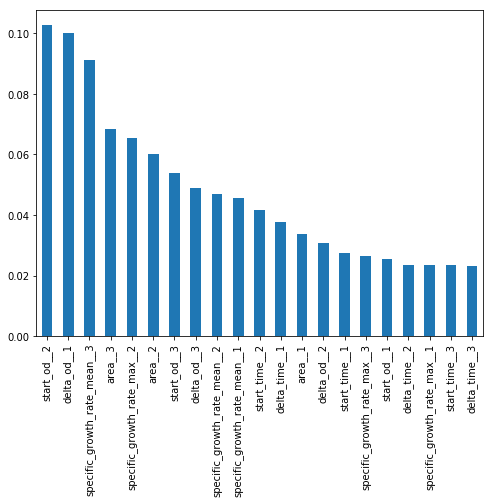

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(1000).plot(kind='bar')
plt.show()
fig.savefig('feature_importance_RF_succinate.svg', format='svg', dpi=1200)

## Test significance of features

In [16]:
pvallist = []
featurelist = []
for feature in df_classification.columns:
    if feature != 'rhamn2cats':
        RL_non_producing_group = list(df_classification.loc[df_classification.rhamn2cats==0, feature].values)
        RL_producing_group = list(df_classification.loc[df_classification.rhamn2cats==1, feature].values)
        _,pval = scipy.stats.ttest_ind(RL_non_producing_group, RL_producing_group, equal_var=False)
        pvallist.append(pval)
        featurelist.append(feature)
        
order = np.argsort(pvallist)
pvallist = [pvallist[x] for x in order]
featurelist = [featurelist[x] for x in order]

for feature,pval in zip(featurelist, pvallist):
    if (pval <= 0.05):
        print("SIGNIFICANT, %s, p-value = %2.2e"%(feature, pval))
    else:
        print("NOT SIGNIFICANT, %s, p-value = %2.2e"%(feature, pval))

SIGNIFICANT, specific_growth_rate_mean__1, p-value = 2.48e-02
NOT SIGNIFICANT, specific_growth_rate_max__2, p-value = 8.73e-02
NOT SIGNIFICANT, area__3, p-value = 9.35e-02
NOT SIGNIFICANT, delta_time__1, p-value = 1.16e-01
NOT SIGNIFICANT, specific_growth_rate_mean__3, p-value = 1.50e-01
NOT SIGNIFICANT, start_od__1, p-value = 1.75e-01
NOT SIGNIFICANT, area__2, p-value = 2.68e-01
NOT SIGNIFICANT, start_od__3, p-value = 3.23e-01
NOT SIGNIFICANT, specific_growth_rate_mean__2, p-value = 3.34e-01
NOT SIGNIFICANT, start_od__2, p-value = 3.63e-01
NOT SIGNIFICANT, start_time__2, p-value = 3.72e-01
NOT SIGNIFICANT, delta_od__2, p-value = 3.73e-01
NOT SIGNIFICANT, specific_growth_rate_max__1, p-value = 3.88e-01
NOT SIGNIFICANT, delta_od__1, p-value = 4.24e-01
NOT SIGNIFICANT, delta_time__2, p-value = 4.84e-01
NOT SIGNIFICANT, start_time__3, p-value = 5.13e-01
NOT SIGNIFICANT, delta_time__3, p-value = 5.13e-01
NOT SIGNIFICANT, start_time__1, p-value = 5.48e-01
NOT SIGNIFICANT, delta_od__3, p-val

## Plot comparison of features between producing and non-producing strains

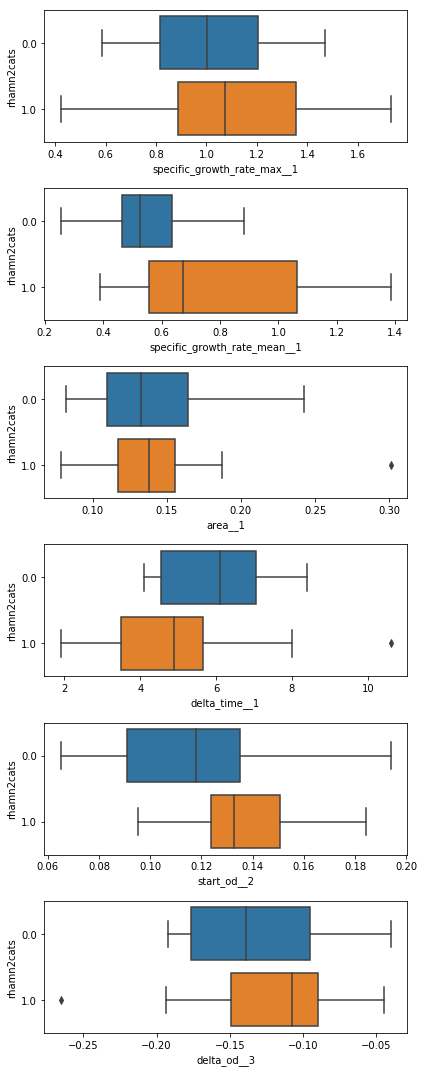

In [19]:
features_to_compare = ['specific_growth_rate_max__1',
                       'specific_growth_rate_mean__1',
                       'area__1',
                       'delta_time__1',
                       'start_od__2',
                       'delta_od__3']

fig, ax = plt.subplots(len(features_to_compare),1,figsize=(6, 2.5*len(features_to_compare)))
for index, feature in enumerate(features_to_compare):
    g = sns.boxplot(y='rhamn2cats', x=feature, data=df_classification, ax=ax[index], orient='h')
    #g.set_xticklabels(g.get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()
#fig.savefig('boxplot_growth_curve_features.svg', format='svg', dpi=1200)

# Compare growth curve features between glycerol and succinate

In [6]:
df_growth_curve_feature_glycerol.head()

strain  phase  start_time  end_time  delta_time  start_od  delta_od  \
0  F22031      1         3.3      20.6        17.3  0.006426  0.341041   
1  F22031      2        20.6      36.7        16.1  0.347467  0.669791   
2  F22031      3        36.7      48.0        11.3  1.017258 -0.046485   
3  F23197      1        12.8      32.5        19.7  0.008182  0.416802   
4  F23197      2        32.5      43.6        11.1  0.424984  0.469181   

        area best_model        r2  growth_rate_max  growth_rate_mean  \
0   1.449650        EXP  0.996811         0.092024          0.021197   
1  11.985124        EXP  0.945412         0.065825          0.042927   
2  11.244500        EXP  0.989257         0.003777         -0.004222   
3   2.441355        EXP  0.975862         0.091943          0.024289   
4   7.573974        EXP  0.982909         0.053892          0.039710   

   specific_growth_rate_max  specific_growth_rate_mean  
0                  0.249327                   0.249327  
1                  0.057574                   0.057574  
2                  0.003710                  -0.004248  
3                  0.188350                   0.188350  
4                  0.058201                   0.058201

In [7]:
# combine glycerol and succinate tables
features = ['start_time','delta_time','start_od','delta_od','area','specific_growth_rate_mean','specific_growth_rate_max']
df_growth_curve_feature_glycerol_pivot = df_growth_curve_feature_glycerol[['strain','phase']+features].set_index(['strain','phase']).stack().reset_index()
df_growth_curve_feature_glycerol_pivot['carbon'] = 'glycerol'
df_growth_curve_feature_glycerol_pivot.columns = ['strain','phase','feature','value','carbon']

df_growth_curve_feature_succinate_pivot = df_growth_curve_feature_succinate[['strain','phase']+features].set_index(['strain','phase']).stack().reset_index()
df_growth_curve_feature_succinate_pivot['carbon'] = 'succinate'
df_growth_curve_feature_succinate_pivot.columns = ['strain','phase','feature','value','carbon']

df_combined = pd.concat([df_growth_curve_feature_glycerol_pivot, df_growth_curve_feature_succinate_pivot])
df_combined

strain  phase                    feature      value     carbon
0    F22031      1                 start_time   3.300000   glycerol
1    F22031      1                 delta_time  17.300000   glycerol
2    F22031      1                   start_od   0.006426   glycerol
3    F22031      1                   delta_od   0.341041   glycerol
4    F22031      1                       area   1.449650   glycerol
..      ...    ...                        ...        ...        ...
667   X9820      3                   start_od   0.358651  succinate
668   X9820      3                   delta_od  -0.166550  succinate
669   X9820      3                       area   9.170524  succinate
670   X9820      3  specific_growth_rate_mean  -0.015085  succinate
671   X9820      3   specific_growth_rate_max   0.001770  succinate

[1344 rows x 5 columns]

start_time
delta_time
start_od
delta_od
area
specific_growth_rate_mean
specific_growth_rate_max


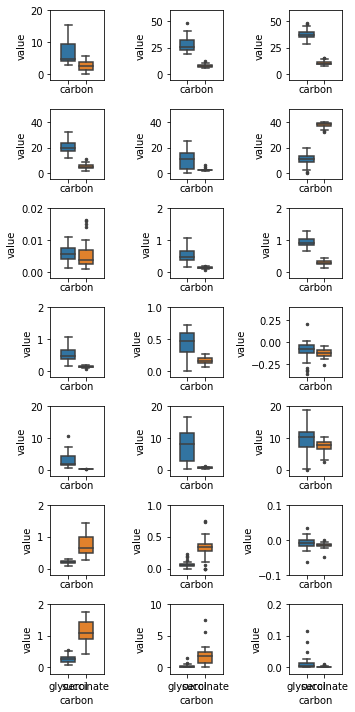

In [8]:
fig, axes = plt.subplots(7, 3, figsize=(5, 10), sharex=True)
flierprops = dict(markersize=5, marker='.',linestyle='none')

for i,f in enumerate(features):
    print(f)
    for j in np.arange(1,4):
        data = df_combined[(df_combined.phase==j) & (df_combined.feature==f)]
        sns.boxplot(x='carbon', y='value', data=data, ax=axes[i,j-1], flierprops=flierprops)
        axes[i,j-1].set_xlim([-1,2])

axes[0,0].set_ylim([-2,20])
axes[0,1].set_ylim([-6,60])
axes[0,2].set_ylim([-6,60])
axes[1,0].set_ylim([-5,50])
axes[1,1].set_ylim([-5,50])
axes[1,2].set_ylim([-5,50])
axes[2,0].set_ylim([-0.002,0.02])
axes[2,1].set_ylim([-0.2,2])
axes[2,2].set_ylim([-0.2,2])
axes[3,0].set_ylim([-0.2,2])
axes[3,1].set_ylim([-0.1,1])
axes[3,2].set_ylim([-0.4,0.4])
axes[4,0].set_ylim([-2,20])
axes[4,1].set_ylim([-2,20])
axes[4,2].set_ylim([-2,20])
axes[5,0].set_ylim([-0.2,2])
axes[5,1].set_ylim([-0.1,1])
axes[5,2].set_ylim([-0.1,0.1])
axes[6,0].set_ylim([-0.2,2])
axes[6,1].set_ylim([-1,10])
axes[6,2].set_ylim([-0.02,0.2])

plt.tight_layout()
plt.savefig('comparison_growth_curve_feature_between_glycerol_succinate.eps', format='eps')